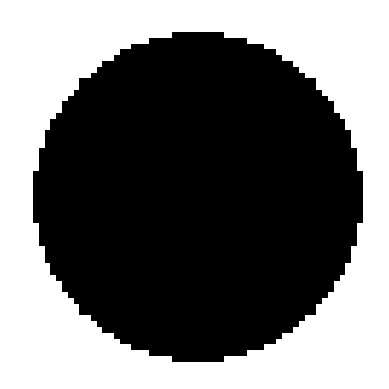

In [1]:
import numpy as np
from PIL import Image

def create_circle_image(image_size, circle_radius):
    # Create a white image with the specified size
    image = np.ones((image_size, image_size), dtype=np.uint8)

    # Calculate the center coordinates of the circle
    center = (image_size // 2, image_size // 2)

    # Draw the circle on the image
    for i in range(image_size):
        for j in range(image_size):
            if np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2) <= circle_radius:
                image[i, j] = 0

    return image

import matplotlib.pyplot as plt

# Create the circle image
circle_image = create_circle_image(64, np.sqrt(0.5 * 40**2))

# Plot the image
plt.imshow(circle_image, cmap='gray')
plt.axis('off')
plt.show()


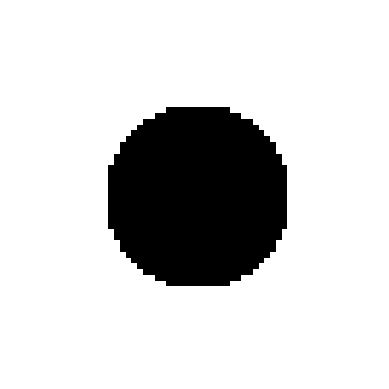

interactive(children=(IntSlider(value=16, description='radius', max=64, step=0), Output()), _dom_classes=('wid…

<function __main__.update_plot(radius)>

In [6]:
import numpy as np
from ipywidgets import interact, IntSlider

import matplotlib.pyplot as plt

def create_circle_image(image_size, circle_radius):
    # Create a white image with the specified size
    image = np.ones((image_size, image_size), dtype=np.uint8)

    # Calculate the center coordinates of the circle
    center = (image_size // 2, image_size // 2)

    # Draw the circle on the image
    for i in range(image_size):
        for j in range(image_size):
            if np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2) < circle_radius:
                image[i, j] = 0

    return image

# Define the function to update the plot
def update_plot(radius):
    circle_image = create_circle_image(64, radius)
    plt.imshow(circle_image, cmap='gray')
    plt.axis('off')
    plt.show()

# Create the slider
radius_slider = IntSlider(min=0, max=64, step=0.5, value=16)

# Plot the initial circle image
update_plot(radius_slider.value)

# Update the plot when the slider value changes
interact(update_plot, radius=radius_slider)

In [10]:
[create_circle_image(64, i) for i in range(128)]

[array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1

In [63]:
import torch

def create_circle_images(image_size, radii):
    # Create a meshgrid of coordinates
    y, x = torch.meshgrid(torch.arange(image_size), torch.arange(image_size))
    y, x = y.float(), x.float()
    
    # Calculate the center coordinates of the circle
    center = image_size // 2

    # Calculate distance from the center for each coordinate
    dist_from_center = torch.sqrt((x - center) ** 2 + (y - center) ** 2)

    # Initialize a tensor to hold all the circle images
    num_radii = len(radii)
    images = torch.ones((num_radii, image_size, image_size))

    # Create circle images for each radius
    for idx, radius in enumerate(radii):
        images[idx] = (dist_from_center < radius)

    return images

# Example usage:
image_size = 12
radii = torch.linspace(0, 19.8,10)
circle_images = create_circle_images(image_size, radii)

In [64]:
print(circle_images[2])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


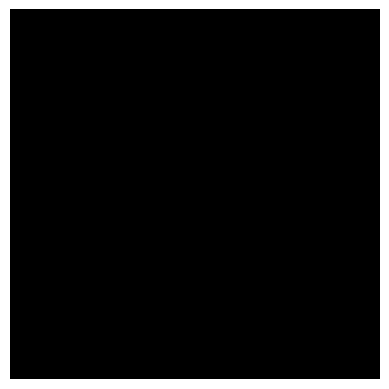

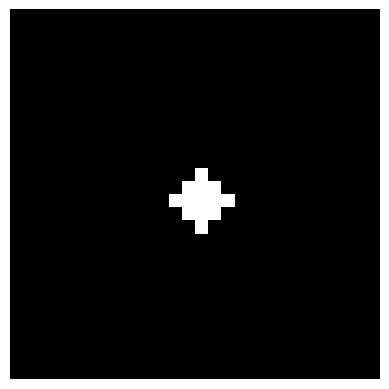

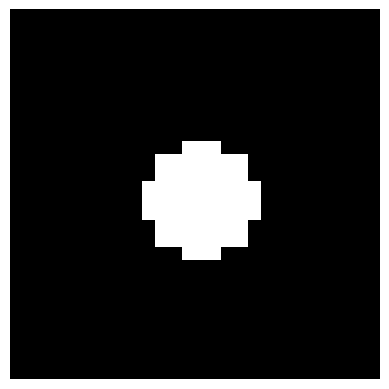

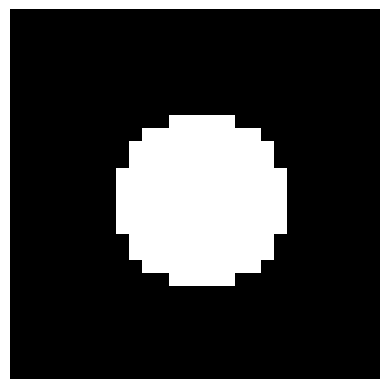

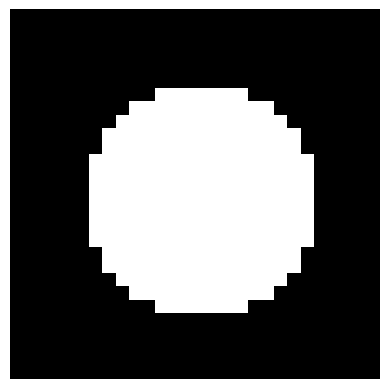

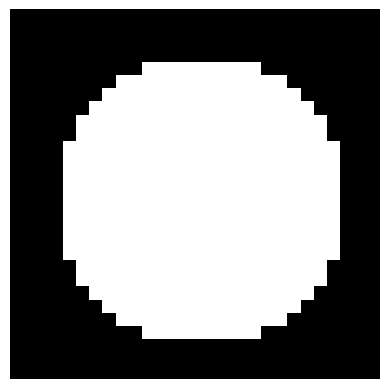

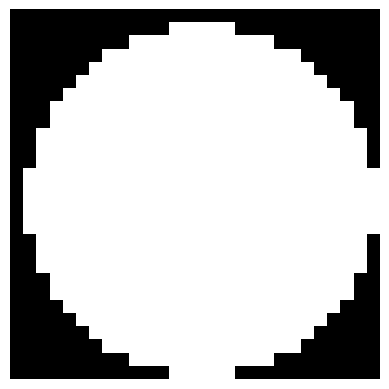

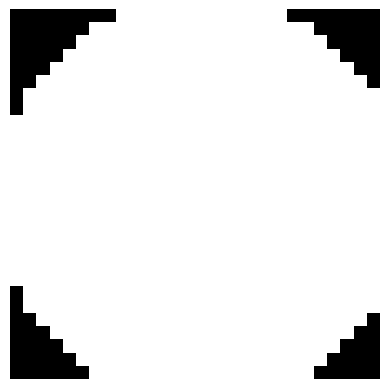

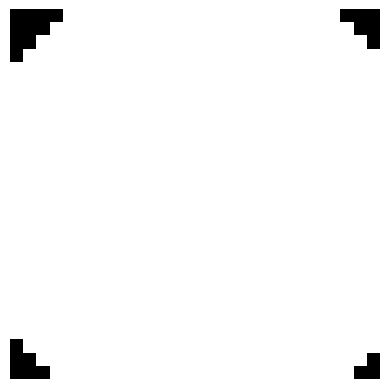

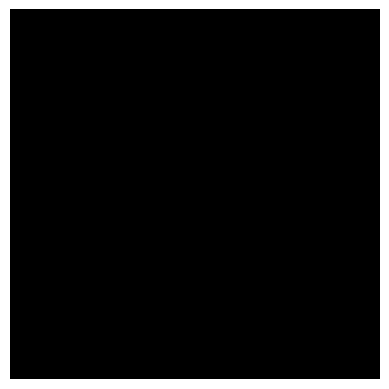

In [33]:
import torch

import matplotlib.pyplot as plt

# Plot the circle images
for image in circle_images:
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()